# Lab 01 - Parametric Methods
## ENGR421
### October 17, 2025

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Parameters

In [55]:
np.random.seed(421)
# mean parameters
class_means = np.array([-3.0, -1.0, 3.0])
# standard deviation parameters
class_deviations = np.array([1.2, 1.0, 1.3])
# sample sizes
class_sizes = np.array([40, 30, 50])

## Data Generation

In [56]:
# generate random samples

pointsa=[0,0,0]
for i in range(3):
    pointsa[i]=np.random.normal(loc = class_means[i],
                           scale = class_deviations[i],
                           size = class_sizes[i])
    


points1 = np.random.normal(loc = class_means[0],
                           scale = class_deviations[0],
                           size = class_sizes[0])
points2 = np.random.normal(loc = class_means[1],
                           scale = class_deviations[1],
                           size = class_sizes[1])
points3 = np.random.normal(loc = class_means[2],
                           scale = class_deviations[2],
                           size = class_sizes[2])
points = np.concatenate((points1, points2, points3))

# generate corresponding labels
y = np.concatenate((np.repeat(1, class_sizes[0]),
                    np.repeat(2, class_sizes[1]),
                    np.repeat(3, class_sizes[2])))


## Exporting Data

In [57]:
# write data to a file
np.savetxt(fname = "lab01_data_set.csv",
           X = np.stack((points, y), axis = 1),
           fmt = "%f,%d")

## Plotting Data

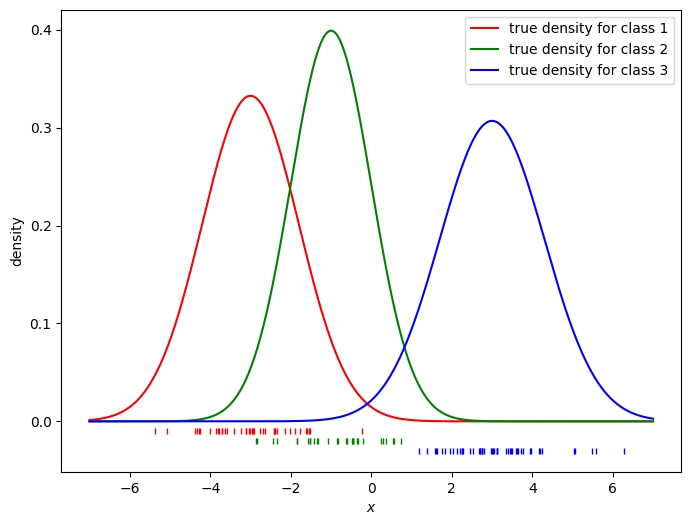

In [58]:
data_interval = np.linspace(start = -7, stop = +7, num = 701)
density1 = stats.norm.pdf(data_interval,
                          loc = class_means[0],
                          scale = class_deviations[0])
density2 = stats.norm.pdf(data_interval,
                          loc = class_means[1],
                          scale = class_deviations[1])
density3 = stats.norm.pdf(data_interval,
                          loc = class_means[2],
                          scale = class_deviations[2])

plt.figure(figsize = (8, 6)) 
# plot data points of the first class
plt.plot(points1, np.repeat(-0.01, class_sizes[0]), "r|", markersize = 5)
# plot density of the first class
plt.plot(data_interval, density1, "r", label = "true density for class 1")
# plot data points of the second class
plt.plot(points2, np.repeat(-0.02, class_sizes[1]), "g|", markersize = 5)
# plot density of the second class
plt.plot(data_interval, density2, "g", label = "true density for class 2")
# plot data points of the third class
plt.plot(points3, np.repeat(-0.03, class_sizes[2]), "b|", markersize = 5)
# plot density of the third class
plt.plot(data_interval, density3, "b", label = "true density for class 3")
plt.xlabel("$x$")
plt.ylabel("density")
plt.legend()
plt.show()

## Importing Data

In [59]:
# read data into memory
data_set = np.genfromtxt(fname = "lab01_data_set.csv", delimiter = ",")
print(data_set.shape)

# get x and y values
x = data_set[:, 0]
y = data_set[:, 1].astype(int) 

# get number of classes and number of samples
K = np.max(y)
N = data_set.shape[0]
print(N, K)

(120, 2)
120 3


## Parameter Estimation

$\hat{\mu}_{c} = \dfrac{\sum\limits_{i = 1}^{N} x_{i} \mathbb{1}(y_{i} = c)}{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}$

In [60]:
# calculate sample means
sample_means = [np.mean(x[y == (c + 1)]) for c in range(K)]
print(sample_means)
sample_deviations = [np.std(x[y == (c + 1)]) for c in range(K)]
print(sample_deviations)

[np.float64(-3.0110642), np.float64(-0.8937802000000001), np.float64(3.0997409400000002)]
[np.float64(1.047718811615316), np.float64(0.9819339428535371), np.float64(1.1100074735661452)]


$\hat{\sigma}_{c}^{2} = \dfrac{\sum\limits_{i = 1}^{N} (x_{i} - \hat{\mu}_{c})^{2} \mathbb{1}(y_{i} = c)}{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}$

In [61]:
# calculate sample deviations
sample_deviations = [np.sqrt(np.mean((x[y == (c + 1)] - sample_means[c])**2))
                     for c in range(K)]
print(sample_deviations)

[np.float64(1.047718811615316), np.float64(0.9819339428535371), np.float64(1.1100074735661452)]


$\widehat{\Pr}(y = c) = \dfrac{\sum\limits_{i = 1}^{N} \mathbb{1}(y_{i} = c)}{N}$

In [62]:
# calculate prior probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
print(class_priors)

[np.float64(0.3333333333333333), np.float64(0.25), np.float64(0.4166666666666667)]


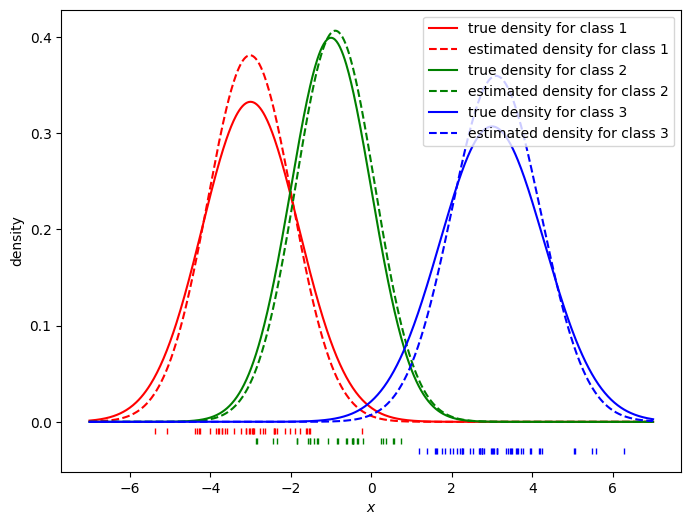

In [63]:
data_interval = np.linspace(start = -7, stop = +7, num = 701)
density1 = stats.norm.pdf(data_interval,
                          loc = class_means[0],
                          scale = class_deviations[0])
density2 = stats.norm.pdf(data_interval,
                          loc = class_means[1],
                          scale = class_deviations[1])
density3 = stats.norm.pdf(data_interval,
                          loc = class_means[2],
                          scale = class_deviations[2])
density1_hat = stats.norm.pdf(data_interval,
                              loc = sample_means[0],
                              scale = sample_deviations[0])
density2_hat = stats.norm.pdf(data_interval,
                              loc = sample_means[1],
                              scale = sample_deviations[1])
density3_hat = stats.norm.pdf(data_interval,
                              loc = sample_means[2],
                              scale = sample_deviations[2])

plt.figure(figsize = (8, 6))
# plot data points of the first class
plt.plot(points1, np.repeat(-0.01, class_sizes[0]), "r|", markersize = 5)
# plot density of the first class
plt.plot(data_interval, density1, "r", label = "true density for class 1")
plt.plot(data_interval, density1_hat, "r--", label = "estimated density for class 1")
# plot data points of the second class
plt.plot(points2, np.repeat(-0.02, class_sizes[1]), "g|", markersize = 5)
# plot density of the second class
plt.plot(data_interval, density2, "g", label = "true density for class 2")
plt.plot(data_interval, density2_hat, "g--", label = "estimated density for class 2")
# plot data points of the third class
plt.plot(points3, np.repeat(-0.03, class_sizes[2]), "b|", markersize = 5)
# plot density of the third class
plt.plot(data_interval, density3, "b", label = "true density for class 3")
plt.plot(data_interval, density3_hat, "b--", label = "estimated density for class 3")
plt.xlabel("$x$")
plt.ylabel("density")
plt.legend()
plt.show()

## Parametric Classification

In [64]:
data_interval = np.linspace(start = -7, stop = +7, num = 701)

\begin{align*}
g_{c}(x) &= \log \hat{p}(x | y = c) + \log \widehat{\Pr}(y = c)\\
&= -\dfrac{1}{2} \log(2 \pi \hat{\sigma}_{c}^{2}) - \dfrac{(x - \hat{\mu}_{c})^{2}}{2 \hat{\sigma}_{c}^{2}} + \log \widehat{\Pr}(y = c)
\end{align*}

In [65]:
# evaluate score functions
score_values = np.stack([- 0.5 * np.log(2 * np.pi * sample_deviations[c]**2) 
                         - 0.5 * (data_interval - sample_means[c])**2 / sample_deviations[c]**2 
                         + np.log(class_priors[c])
                         for c in range(K)])
print(score_values)

[[ -9.3117727   -9.2392778   -9.1671473  ... -47.35012267 -47.53197437
  -47.71419046]
 [-21.6222754  -21.4958233  -21.36978605 ... -34.27322345 -34.43633954
  -34.59987049]
 [-43.29289523 -43.12911623 -42.96566188 ...  -7.94592902  -8.00875195
   -8.07189953]]


\begin{align*}
\log \widehat{\Pr}(y = c | x) &= \log \hat{p}(x | y = c) + \log \widehat{\Pr}(y = c) - \log \hat{p}(x)\\
\log \hat{p}(x) &= \log\left(\sum \limits_{c = 1}^{K} \hat{p}(x | y = c) \widehat{\Pr}(y = c)\right)
\end{align*}

We used the following property to calculate $\log \hat{p}(x)$:

$\log\left(\sum\limits_{i = 1}^{N} \exp(x_{i})\right) = m + \log\left(\sum\limits_{i = 1}^{N} \exp(x_{i} - m)\right)$

where $m = \max(x_{1}, x_{2}, \dots, x_{N})$.

In [66]:
# calculate log posteriors
log_posteriors = score_values - [np.max(score_values[:, r]) + 
                                 np.log(np.sum(np.exp(score_values[:, r] - np.max(score_values[:, r]))))
                                 for r in range(score_values.shape[1])]

## Score Functions

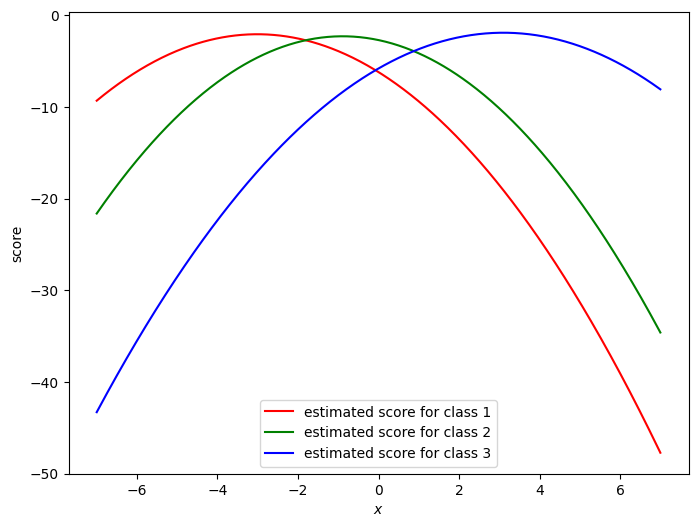

In [67]:
plt.figure(figsize = (8, 6))
# plot score function of the first class
plt.plot(data_interval, score_values[0, :], "r",
         label = "estimated score for class 1")
# plot score function of the second class
plt.plot(data_interval, score_values[1, :], "g",
         label = "estimated score for class 2")
# plot score function of the third class
plt.plot(data_interval, score_values[2, :], "b",
         label = "estimated score for class 3")
plt.xlabel("$x$")
plt.ylabel("score")
plt.legend()
plt.show()

## Posteriors

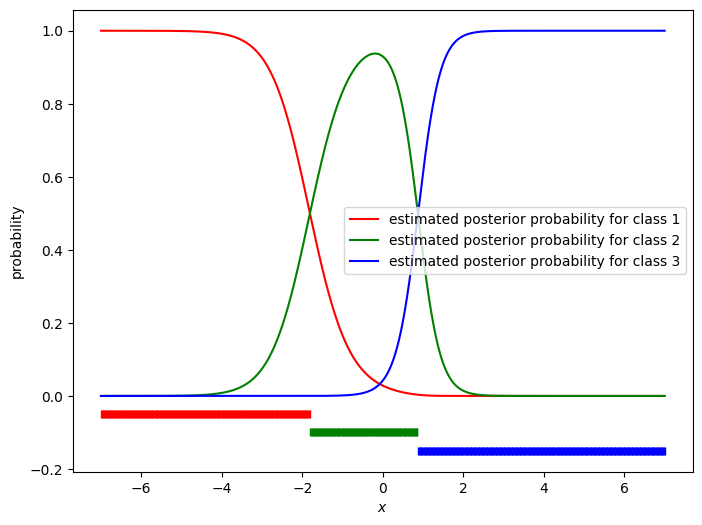

In [68]:
plt.figure(figsize = (8, 6))
# plot posterior probability of the first class
plt.plot(data_interval, np.exp(log_posteriors[0, :]), "r",
         label = "estimated posterior probability for class 1")
# plot posterior probability of the second class
plt.plot(data_interval, np.exp(log_posteriors[1, :]), "g",
         label = "estimated posterior probability for class 2")
# plot posterior probability of the third class
plt.plot(data_interval, np.exp(log_posteriors[2, :]), "b",
         label = "estimated posterior probability for class 3")

class_assignments = np.argmax(score_values, axis = 0)

#plot region where the first class has the highest probability
plt.plot(data_interval[class_assignments == 0], 
         np.repeat(-0.05, np.sum(class_assignments == 0)), "r|")
#plot region where the second class has the highest probability
plt.plot(data_interval[class_assignments == 1], 
         np.repeat(-0.10, np.sum(class_assignments == 1)), "g|")
#plot region where the third class has the highest probability
plt.plot(data_interval[class_assignments == 2], 
         np.repeat(-0.15, np.sum(class_assignments == 2)), "b|")

plt.xlabel("$x$")
plt.ylabel("probability")
plt.legend()
plt.show()